In [1]:
# Import useful quantities 

import numpy as np
from qiskit.circuit import QuantumCircuit,ClassicalRegister, QuantumRegister

# Some new useful methods

from Hamiltonian import generate_XYZ
from ansatz.ansatz import *
from ansatz.helper import  *
from algorithms.vqe import VQE


from qiskit.opflow.gradients           import Gradient
from qiskit.opflow.state_fns           import CircuitStateFn, StateFn
from qiskit.opflow.expectations        import PauliExpectation
from qiskit.opflow.converters          import CircuitSampler


from qiskit import Aer, execute
from qiskit.utils.quantum_instance import QuantumInstance

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
n_qubits= 2
H = generate_XYZ(J_x=0.1,J_y=0,J_z=0,field=0.5,n_spins=n_qubits)
print(H)
n_layer  = 5
int_len = 1
ansatz = lambda parameter: feature_map_ansatz(parameter,n_qubits=n_qubits,n_layer=n_layer,
                                                interaction_length=int_len, interaction_type = 'z',full_rotation=False)
 

len_param = get_len_param(n_qubits=n_qubits, n_layer = n_layer, interaction_length=int_len, full_rotation = False)


parameters =2*np.pi* np.random.rand(len_param)

backend = Aer.get_backend('statevector_simulator')
instance = QuantumInstance(backend, seed_simulator=2, seed_transpiler=2)

-0.1 * XX
- 0.05 * YY
- 0.05 * YY
- 0.05 * ZZ
- 0.05 * ZZ
- 0.25 * IZ
- 0.25 * ZI


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.components.optimizers',


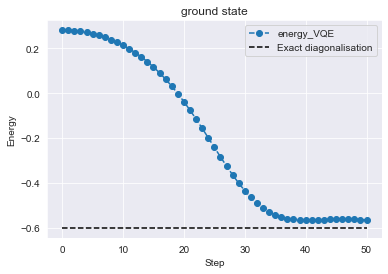

KeyError: '0'

In [3]:
vqe = VQE(hamiltonian=H, n_qubits=n_qubits, instance=instance, shots=1)
vqe.ansatz = ansatz
for i in range(1):
    parameters = vqe.update(parameters)
    
vqe.exact_energy = vqe.compute_exact_energy()    

plt.figure()
plt.title('ground state')
plt.plot(vqe.cost['0'],marker='o',linestyle='dashed',label='energy_VQE')
#plt.plot(steps,res_quasm['energies'],marker='o',linestyle='dashed',label='QASM_VQE')
plt.hlines(vqe.exact_energy[0], xmin= 0.0, xmax= len(vqe.cost['0'])-1,
           label='Exact diagonalisation',linestyle ='dashed',color='black')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)

plt.show()


lev=1
parameters = 1*np.pi*np.random.rand(len_param)
for j in range(1):
    parameters = vqe.update(parameters,level=lev)
plt.figure()
plt.title( str(lev)+' excited state')
plt.plot(vqe.cost[str(lev)][15:],marker='o',linestyle='dashed',label='energy_VQE')
#plt.plot(steps,res_quasm['energies'],marker='o',linestyle='dashed',label='QASM_VQE')
plt.hlines(vqe.exact_energy[lev], xmin= 0.0, xmax= len(vqe.cost[str(lev)][15:]),
            label='Exact diagonalisation',linestyle ='dashed',color='black')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.ylim()
plt.legend()
plt.grid(True)

plt.show() 

In [ ]:
for i in range(1):
    parameters = vqe.update(parameters)

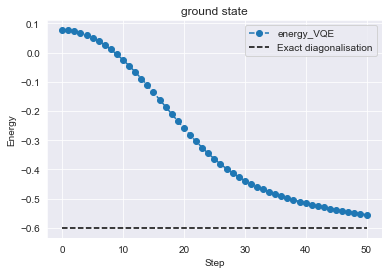

We will compute iteratively the excited states

In [4]:
lev=2
parameters = 1*np.pi*np.random.rand(len_param)
for j in range(1):
    parameters = vqe.update(parameters,level=lev)
plt.figure()
plt.title( str(lev)+' excited state')
plt.plot(vqe.cost[str(lev)][15:],marker='o',linestyle='dashed',label='energy_VQE')
#plt.plot(steps,res_quasm['energies'],marker='o',linestyle='dashed',label='QASM_VQE')
plt.hlines(vqe.exact_energy[lev], xmin= 0.0, xmax= len(vqe.cost[str(lev)][15:]),
            label='Exact diagonalisation',linestyle ='dashed',color='black')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.ylim()
plt.legend()
plt.grid(True)

plt.show()   

KeyError: '1'

# Test overlap